In [1]:
import pandas as pd
import json
import os
from pandas.io.json import json_normalize
import numpy as np
import scipy
pd.options.display.float_format = '{:.2f}'.format


In [2]:
path = 'output/evaluation/EvaluateTestSetPredictions/results/'
PATH_TRAIN = "output/models/"

In [3]:
paths = []
models = []

for root, dirs, files in os.walk(path):
    if "/results" in root and "Evaluate" in root:
        for d in dirs:
            paths.append(os.path.join(root, d))
            models.append(d)  # .replace("_"+d.split("_")[-1], "")

results =  dict(zip(models, paths))
results


def fetch_training_path():
    paths = []
    models = []
    for root, dirs, files in os.walk(PATH_TRAIN):
        if "/results" in root:
            for d in dirs:
                paths.append(os.path.join(root, d))
                models.append(d)

    return dict(zip(models, paths))

In [4]:
def json2df(paths, file, idx):
    data = []
    for model, path in paths.items():
        file_path = os.path.join(path, file)
        try:
            with open(file_path) as json_file:
                d = json.load(json_file)
                d["path"] = path.split("/")[-1]
                d["model"] = d["path"].replace("_" + d["path"].split("_")[-1], "")

                data.append(d)
        except:
            data.append({"path": path.split("/")[-1]})

    df = pd.DataFrame.from_dict(json_normalize(data), orient="columns")

    df = df.set_index(idx)

    return df

In [5]:
metrics = json2df(results, "metrics.json", "path")
metrics

,model_task,count,mean_average_precision,precision_at_1,mrr_at_5,mrr_at_10,ndcg_at_5,ndcg_at_10,ndcg_at_15,ndcg_at_20,ndcg_at_50,coverage_at_5,coverage_at_20,model
path,,,,,,,,,,,,,,
TripletPredTraining____mars_gym_model_b____d3874532b4_db449e08df,TripletPredTraining____mars_gym_model_b____d38...,3129,0.42,0.34,0.40,0.41,0.46,0.47,0.48,0.49,0.52,0.44,0.63,TripletPredTraining____mars_gym_model_b____d38...
TripletPredTraining____mars_gym_model_b____8ce48bf1d3_da48175aa8,TripletPredTraining____mars_gym_model_b____8ce...,3129,0.23,0.18,0.21,0.21,0.23,0.24,0.25,0.26,0.30,0.36,0.61,TripletPredTraining____mars_gym_model_b____8ce...
TripletPredTraining____mars_gym_model_b____ed5ed808aa_1c210c3569,TripletPredTraining____mars_gym_model_b____ed5...,3129,0.62,0.51,0.61,0.62,0.71,0.72,0.73,0.74,0.75,0.82,1.00,TripletPredTraining____mars_gym_model_b____ed5...
TripletPredTraining____mars_gym_model_b____42eaab12f4_71709e79cc,TripletPredTraining____mars_gym_model_b____42e...,3129,0.23,0.18,0.21,0.21,0.23,0.24,0.25,0.26,0.30,0.34,0.59,TripletPredTraining____mars_gym_model_b____42e...
TripletPredTraining____mars_gym_model_b____d7befce0e9_e810af2ade,TripletPredTraining____mars_gym_model_b____d7b...,3129,0.09,0.04,0.07,0.07,0.09,0.11,0.12,0.13,0.18,0.41,0.60,TripletPredTraining____mars_gym_model_b____d7b...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SupervisedModelTraining____mars_gym_model_b____b92d68b8b7_178cd69b7e,SupervisedModelTraining____mars_gym_model_b___...,2862,0.67,0.60,0.66,0.67,0.71,0.73,0.74,0.75,0.76,0.11,0.39,SupervisedModelTraining____mars_gym_model_b___...
SupervisedModelTraining____mars_gym_model_b____65a4279585_07c545cc6e,SupervisedModelTraining____mars_gym_model_b___...,4539,0.46,0.36,0.43,0.44,0.50,0.53,0.54,0.55,0.58,0.17,0.52,SupervisedModelTraining____mars_gym_model_b___...
TripletPredTraining____mars_gym_model_b____c8f941d2bf_36e411030f,TripletPredTraining____mars_gym_model_b____c8f...,3129,0.29,0.23,0.27,0.28,0.31,0.33,0.34,0.35,0.38,0.29,0.54,TripletPredTraining____mars_gym_model_b____c8f...


In [6]:
metrics.shape

(86, 14)

In [7]:
params = json2df(fetch_training_path(), "params.json", "path")
params.head()

,project,sample_size,minimum_interactions,session_test_size,test_size,dataset_split_method,test_split_type,val_size,n_splits,split_index,...,recommender_extra_params.from_index_mapping,recommender_extra_params.path_item_embedding,recommender_extra_params.freeze_embedding,recommender_extra_params.num_blocks,recommender_extra_params.num_heads,recommender_extra_params.hist_size,recommender_extra_params.p_L,recommender_extra_params.p_d,recommender_extra_params.p_nh,recommender_extra_params.p_nv
path,,,,,,,,,,,,,,,,,,,,,
TripletPredTraining____mars_gym_model_b____1781903829,diginetica.config.diginetica_interaction,-1.00,5.00,0.10,0.20,column,time,0.20,5.00,0.00,...,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan
TripletPredTraining____mars_gym_model_b____957f16bf81,diginetica.config.diginetica_interaction,-1.00,5.00,0.10,0.20,column,time,0.20,5.00,0.00,...,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan
TripletPredTraining____mars_gym_model_b____5b20003c8b,diginetica.config.diginetica_interaction,-1.00,5.00,0.10,0.20,column,time,0.20,5.00,0.00,...,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan
TripletPredTraining____mars_gym_model_b____c5a6d65546,diginetica.config.diginetica_interaction,-1.00,5.00,0.10,0.20,column,time,0.20,5.00,0.00,...,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan
TripletPredTraining____mars_gym_model_b____1f89d23b3c,diginetica.config.diginetica_interaction,-1.00,5.00,0.10,0.20,column,time,0.20,5.00,0.00,...,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan


In [8]:
params.iloc[0]

project                               diginetica.config.diginetica_interaction
sample_size                                                              -1.00
minimum_interactions                                                      5.00
session_test_size                                                         0.10
test_size                                                                 0.20
                                                        ...                   
recommender_extra_params.hist_size                                         NaN
recommender_extra_params.p_L                                               NaN
recommender_extra_params.p_d                                               NaN
recommender_extra_params.p_nh                                              NaN
recommender_extra_params.p_nv                                              NaN
Name: TripletPredTraining____mars_gym_model_b____1781903829, Length: 70, dtype: object

In [9]:
params.shape

(415, 70)

In [10]:
metrics

,model_task,count,mean_average_precision,precision_at_1,mrr_at_5,mrr_at_10,ndcg_at_5,ndcg_at_10,ndcg_at_15,ndcg_at_20,ndcg_at_50,coverage_at_5,coverage_at_20,model
path,,,,,,,,,,,,,,
TripletPredTraining____mars_gym_model_b____d3874532b4_db449e08df,TripletPredTraining____mars_gym_model_b____d38...,3129,0.42,0.34,0.40,0.41,0.46,0.47,0.48,0.49,0.52,0.44,0.63,TripletPredTraining____mars_gym_model_b____d38...
TripletPredTraining____mars_gym_model_b____8ce48bf1d3_da48175aa8,TripletPredTraining____mars_gym_model_b____8ce...,3129,0.23,0.18,0.21,0.21,0.23,0.24,0.25,0.26,0.30,0.36,0.61,TripletPredTraining____mars_gym_model_b____8ce...
TripletPredTraining____mars_gym_model_b____ed5ed808aa_1c210c3569,TripletPredTraining____mars_gym_model_b____ed5...,3129,0.62,0.51,0.61,0.62,0.71,0.72,0.73,0.74,0.75,0.82,1.00,TripletPredTraining____mars_gym_model_b____ed5...
TripletPredTraining____mars_gym_model_b____42eaab12f4_71709e79cc,TripletPredTraining____mars_gym_model_b____42e...,3129,0.23,0.18,0.21,0.21,0.23,0.24,0.25,0.26,0.30,0.34,0.59,TripletPredTraining____mars_gym_model_b____42e...
TripletPredTraining____mars_gym_model_b____d7befce0e9_e810af2ade,TripletPredTraining____mars_gym_model_b____d7b...,3129,0.09,0.04,0.07,0.07,0.09,0.11,0.12,0.13,0.18,0.41,0.60,TripletPredTraining____mars_gym_model_b____d7b...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SupervisedModelTraining____mars_gym_model_b____b92d68b8b7_178cd69b7e,SupervisedModelTraining____mars_gym_model_b___...,2862,0.67,0.60,0.66,0.67,0.71,0.73,0.74,0.75,0.76,0.11,0.39,SupervisedModelTraining____mars_gym_model_b___...
SupervisedModelTraining____mars_gym_model_b____65a4279585_07c545cc6e,SupervisedModelTraining____mars_gym_model_b___...,4539,0.46,0.36,0.43,0.44,0.50,0.53,0.54,0.55,0.58,0.17,0.52,SupervisedModelTraining____mars_gym_model_b___...
TripletPredTraining____mars_gym_model_b____c8f941d2bf_36e411030f,TripletPredTraining____mars_gym_model_b____c8f...,3129,0.29,0.23,0.27,0.28,0.31,0.33,0.34,0.35,0.38,0.29,0.54,TripletPredTraining____mars_gym_model_b____c8f...


## Data

In [36]:
df = metrics.reset_index().merge(params.reset_index(), left_on='model_task', right_on='path')
df['model_class'] = df.apply(lambda row: str(row['model_task']).split("_")[0] + "."+str(row['recommender_module_class']), axis=1)
df.head()

,path_x,model_task,count,mean_average_precision,precision_at_1,mrr_at_5,mrr_at_10,ndcg_at_5,ndcg_at_10,ndcg_at_15,...,recommender_extra_params.path_item_embedding,recommender_extra_params.freeze_embedding,recommender_extra_params.num_blocks,recommender_extra_params.num_heads,recommender_extra_params.hist_size,recommender_extra_params.p_L,recommender_extra_params.p_d,recommender_extra_params.p_nh,recommender_extra_params.p_nv,model_class
0,TripletPredTraining____mars_gym_model_b____d38...,TripletPredTraining____mars_gym_model_b____d38...,3129,0.42,0.34,0.40,0.41,0.46,0.47,0.48,...,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,TripletPredTraining.None
1,TripletPredTraining____mars_gym_model_b____8ce...,TripletPredTraining____mars_gym_model_b____8ce...,3129,0.23,0.18,0.21,0.21,0.23,0.24,0.25,...,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,TripletPredTraining.None
2,TripletPredTraining____mars_gym_model_b____ed5...,TripletPredTraining____mars_gym_model_b____ed5...,3129,0.62,0.51,0.61,0.62,0.71,0.72,0.73,...,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,TripletPredTraining.None
3,TripletPredTraining____mars_gym_model_b____42e...,TripletPredTraining____mars_gym_model_b____42e...,3129,0.23,0.18,0.21,0.21,0.23,0.24,0.25,...,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,TripletPredTraining.None
4,TripletPredTraining____mars_gym_model_b____d7b...,TripletPredTraining____mars_gym_model_b____d7b...,3129,0.09,0.04,0.07,0.07,0.09,0.11,0.12,...,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,TripletPredTraining.None


In [37]:
df.shape
df

,path_x,model_task,count,mean_average_precision,precision_at_1,mrr_at_5,mrr_at_10,ndcg_at_5,ndcg_at_10,ndcg_at_15,...,recommender_extra_params.path_item_embedding,recommender_extra_params.freeze_embedding,recommender_extra_params.num_blocks,recommender_extra_params.num_heads,recommender_extra_params.hist_size,recommender_extra_params.p_L,recommender_extra_params.p_d,recommender_extra_params.p_nh,recommender_extra_params.p_nv,model_class
0,TripletPredTraining____mars_gym_model_b____d38...,TripletPredTraining____mars_gym_model_b____d38...,3129,0.42,0.34,0.40,0.41,0.46,0.47,0.48,...,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,TripletPredTraining.None
1,TripletPredTraining____mars_gym_model_b____8ce...,TripletPredTraining____mars_gym_model_b____8ce...,3129,0.23,0.18,0.21,0.21,0.23,0.24,0.25,...,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,TripletPredTraining.None
2,TripletPredTraining____mars_gym_model_b____ed5...,TripletPredTraining____mars_gym_model_b____ed5...,3129,0.62,0.51,0.61,0.62,0.71,0.72,0.73,...,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,TripletPredTraining.None
3,TripletPredTraining____mars_gym_model_b____42e...,TripletPredTraining____mars_gym_model_b____42e...,3129,0.23,0.18,0.21,0.21,0.23,0.24,0.25,...,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,TripletPredTraining.None
4,TripletPredTraining____mars_gym_model_b____d7b...,TripletPredTraining____mars_gym_model_b____d7b...,3129,0.09,0.04,0.07,0.07,0.09,0.11,0.12,...,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,TripletPredTraining.None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,SupervisedModelTraining____mars_gym_model_b___...,SupervisedModelTraining____mars_gym_model_b___...,2862,0.67,0.60,0.66,0.67,0.71,0.73,0.74,...,False,False,nan,nan,nan,nan,nan,nan,nan,SupervisedModelTraining.model.NARMModel
80,SupervisedModelTraining____mars_gym_model_b___...,SupervisedModelTraining____mars_gym_model_b___...,4539,0.46,0.36,0.43,0.44,0.50,0.53,0.54,...,False,False,2.00,1.00,10.00,nan,nan,nan,nan,SupervisedModelTraining.model.MLSASRec
81,TripletPredTraining____mars_gym_model_b____c8f...,TripletPredTraining____mars_gym_model_b____c8f...,3129,0.29,0.23,0.27,0.28,0.31,0.33,0.34,...,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,TripletPredTraining.None
82,TripletPredTraining____mars_gym_model_b____343...,TripletPredTraining____mars_gym_model_b____343...,3129,0.42,0.34,0.38,0.39,0.42,0.46,0.50,...,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,TripletPredTraining.None


In [38]:
df.columns


Index(['path_x', 'model_task', 'count', 'mean_average_precision',
       'precision_at_1', 'mrr_at_5', 'mrr_at_10', 'ndcg_at_5', 'ndcg_at_10',
       'ndcg_at_15', 'ndcg_at_20', 'ndcg_at_50', 'coverage_at_5',
       'coverage_at_20', 'model_x', 'path_y', 'project', 'sample_size',
       'minimum_interactions', 'session_test_size', 'test_size',
       'dataset_split_method', 'test_split_type', 'val_size', 'n_splits',
       'split_index', 'sampling_strategy', 'balance_fields',
       'use_sampling_in_validation', 'seed', 'observation',
       'load_index_mapping_path', 'negative_proportion', 'device',
       'batch_size', 'epochs', 'optimizer', 'learning_rate', 'loss_function',
       'gradient_norm_clipping', 'gradient_norm_clipping_type',
       'early_stopping_patience', 'early_stopping_min_delta', 'monitor_metric',
       'monitor_mode', 'generator_workers', 'pin_memory', 'run_evaluate',
       'sample_size_eval', 'metrics', 'bandit_policy_class',
       'recommender_module_class', 

In [39]:
df['triplet_path'] = df['path_item_embedding'].apply(lambda x: str(x).split("/")[-2] if len(str(x).split("/")) > 2 else "")

In [40]:
df.columns

Index(['path_x', 'model_task', 'count', 'mean_average_precision',
       'precision_at_1', 'mrr_at_5', 'mrr_at_10', 'ndcg_at_5', 'ndcg_at_10',
       'ndcg_at_15', 'ndcg_at_20', 'ndcg_at_50', 'coverage_at_5',
       'coverage_at_20', 'model_x', 'path_y', 'project', 'sample_size',
       'minimum_interactions', 'session_test_size', 'test_size',
       'dataset_split_method', 'test_split_type', 'val_size', 'n_splits',
       'split_index', 'sampling_strategy', 'balance_fields',
       'use_sampling_in_validation', 'seed', 'observation',
       'load_index_mapping_path', 'negative_proportion', 'device',
       'batch_size', 'epochs', 'optimizer', 'learning_rate', 'loss_function',
       'gradient_norm_clipping', 'gradient_norm_clipping_type',
       'early_stopping_patience', 'early_stopping_min_delta', 'monitor_metric',
       'monitor_mode', 'generator_workers', 'pin_memory', 'run_evaluate',
       'sample_size_eval', 'metrics', 'bandit_policy_class',
       'recommender_module_class', 

In [41]:
df = df[df['project'] == 'mercado_livre.config.mercado_livre_rnn']

In [42]:
#df['use_embedding'] = (df['recommender_extra_params.path_item_embedding'].fillna(False) != False)

df = df.merge(params.reset_index(), left_on='triplet_path', right_on='path', how='left')

columns = [
    'model_class',
    'observation_x',
    'path_x',
    'count',
    "mean_average_precision", "precision_at_1", "mrr_at_5", "ndcg_at_5", "mrr_at_10", "ndcg_at_10",
    'triplet_path',
    'data_frames_preparation_extra_params.sample_days_y', 
    'data_frames_preparation_extra_params.max_itens_per_session_y',
    'data_frames_preparation_extra_params.min_itens_interactions_y',
    'data_frames_preparation_extra_params.max_relative_pos_y',
    'data_frames_preparation_extra_params.pos_max_deep_y',
    'data_frames_preparation_extra_params.filter_first_interaction_y',
    'loss_function_params.l2_reg_y',
    'optimizer_params.weight_decay_y',
    'recommender_extra_params.dropout_y',
    'recommender_extra_params.negative_random_y'
    ]

df_metrics = df[columns]
df_metrics.head()

,model_class,observation_x,path_x,count,mean_average_precision,precision_at_1,mrr_at_5,ndcg_at_5,mrr_at_10,ndcg_at_10,...,data_frames_preparation_extra_params.sample_days_y,data_frames_preparation_extra_params.max_itens_per_session_y,data_frames_preparation_extra_params.min_itens_interactions_y,data_frames_preparation_extra_params.max_relative_pos_y,data_frames_preparation_extra_params.pos_max_deep_y,data_frames_preparation_extra_params.filter_first_interaction_y,loss_function_params.l2_reg_y,optimizer_params.weight_decay_y,recommender_extra_params.dropout_y,recommender_extra_params.negative_random_y
0,SupervisedModelTraining.model.NARMModel,,SupervisedModelTraining____mars_gym_model_b___...,1803,0.58,0.48,0.56,0.64,0.57,0.66,...,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan
1,SupervisedModelTraining.model.NARMModel,,SupervisedModelTraining____mars_gym_model_b___...,1803,0.48,0.40,0.46,0.52,0.47,0.55,...,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan
2,SupervisedModelTraining.model.NARMModel,,SupervisedModelTraining____mars_gym_model_b___...,1803,0.65,0.57,0.63,0.69,0.64,0.71,...,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan
3,SupervisedModelTraining.model.MLSASRec,,SupervisedModelTraining____mars_gym_model_b___...,4539,0.50,0.41,0.48,0.54,0.49,0.57,...,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan
4,SupervisedModelTraining.model.MLSASRec,,SupervisedModelTraining____mars_gym_model_b___...,2862,0.62,0.54,0.60,0.66,0.61,0.68,...,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan


In [43]:
df_metrics = df_metrics.sort_values(["model_class","observation_x", "mean_average_precision",  "precision_at_1", 'mrr_at_5', 'ndcg_at_10'])

df_metrics.sort_values(['ndcg_at_10']).style.bar(subset=["mean_average_precision",  "precision_at_1", 'mrr_at_5', 'ndcg_at_5', 'mrr_at_10', 'ndcg_at_10'], 
                     align='zero', color=['#d65f5f', '#5fba7d'])


,model_class,observation_x,path_x,count,mean_average_precision,precision_at_1,mrr_at_5,ndcg_at_5,mrr_at_10,ndcg_at_10,triplet_path,data_frames_preparation_extra_params.sample_days_y,data_frames_preparation_extra_params.max_itens_per_session_y,data_frames_preparation_extra_params.min_itens_interactions_y,data_frames_preparation_extra_params.max_relative_pos_y,data_frames_preparation_extra_params.pos_max_deep_y,data_frames_preparation_extra_params.filter_first_interaction_y,loss_function_params.l2_reg_y,optimizer_params.weight_decay_y,recommender_extra_params.dropout_y,recommender_extra_params.negative_random_y
10,SupervisedModelTraining.model.GRURecModel,,SupervisedModelTraining____mars_gym_model_b____b9deb8ea49_65f0ba539d,1803,0.214086,0.114254,0.17958,0.244438,0.19594,0.287101,,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
6,SupervisedModelTraining.model.MLTransformerModel,flatten,SupervisedModelTraining____mars_gym_model_b____a5cd886536_56f3a1e7bc,1803,0.276802,0.192457,0.248761,0.304382,0.259604,0.332391,,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
9,SupervisedModelTraining.model.MLTransformerModel,,SupervisedModelTraining____mars_gym_model_b____5670bf73eb_18ed0d1a39,1803,0.283558,0.18081,0.252847,0.324059,0.266649,0.359798,,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
20,SupervisedModelTraining.model.MLSASRec,,SupervisedModelTraining____mars_gym_model_b____7a4571053e_be4f5c846e,1803,0.413411,0.333888,0.387151,0.439461,0.398853,0.469724,,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
15,SupervisedModelTraining.model.MLCaser,,SupervisedModelTraining____mars_gym_model_b____d1cbc97f7d_e41c48b7c8,1803,0.414222,0.315585,0.387955,0.459058,0.400347,0.490878,,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
23,SupervisedModelTraining.model.MLSASRec,using all QKV,SupervisedModelTraining____mars_gym_model_b____65a4279585_07c545cc6e,4539,0.455739,0.363737,0.431141,0.497768,0.443206,0.528753,,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
18,SupervisedModelTraining.model.MLCaser,,SupervisedModelTraining____mars_gym_model_b____d6aa1353da_b4065feb8a,1803,0.456241,0.356628,0.429617,0.501572,0.443157,0.53659,,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,SupervisedModelTraining.model.NARMModel,,SupervisedModelTraining____mars_gym_model_b____6cee1338c9_934aa421f6,1803,0.482697,0.395452,0.459641,0.522946,0.470545,0.551225,,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,SupervisedModelTraining.model.MLSASRec,,SupervisedModelTraining____mars_gym_model_b____314ff8d9ff_3e1791cd67,4539,0.503664,0.414629,0.480047,0.544615,0.491487,0.574303,,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
14,SupervisedModelTraining.model.MLSASRec,,SupervisedModelTraining____mars_gym_model_b____d851118590_64b267f3c6,1803,0.50947,0.425957,0.487003,0.547212,0.497496,0.57439,,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [45]:
df_metrics.sort_values(['ndcg_at_10']).iloc[-2].path_x

'SupervisedModelTraining____mars_gym_model_b____d2bd990dcf_bfeaaef9c8'

In [51]:
df_metrics[df_metrics.model_class.isin(["SupervisedModelTraining.model.NARMModel"])].shape

(12, 21)

In [53]:
# import plotly.express as px

# columns = {
#     'recommender_extra_params.hidden_size_y': "hidden_size",
#     'recommender_extra_params.n_layers_y': "n_layers",
#     'recommender_extra_params.dropout_y': "Dropout",
#     'optimizer_params.weight_decay_y': "WeightDecay"
# }

# # df = df.sort_values(['data_frames_preparation_extra_params.max_itens_per_session_y', 
# #                      'data_frames_preparation_extra_params.max_relative_pos_y',
# #                      'data_frames_preparation_extra_params.pos_max_deep_y',
# #                      'data_frames_preparation_extra_params.filter_first_interaction_y'])
# df  = df_metrics[df_metrics.model_class.isin(["SupervisedModelTraining.model.NARMModel"])]

# fig = px.parallel_categories(df, dimensions=list(columns.keys()),
#                 color="ndcg_at_10", 
#                 color_continuous_scale=px.colors.sequential.YlOrRd,
#                 labels=columns)
# fig.show()

In [48]:
df_metrics.to_csv('output/metrics.csv')

In [49]:
df  = df_metrics[df_metrics.model_class.isin(["TripletPredTraining.None"])]
print(df.shape)
df.style.bar(subset=["mean_average_precision",  "precision_at_1", 'mrr_at_5', 'ndcg_at_5', 'mrr_at_10', 'ndcg_at_10'], 
                     align='zero', color=['#d65f5f', '#5fba7d'])

(0, 20)


,model_class,observation_x,count,mean_average_precision,precision_at_1,mrr_at_5,ndcg_at_5,mrr_at_10,ndcg_at_10,triplet_path,data_frames_preparation_extra_params.sample_days_y,data_frames_preparation_extra_params.max_itens_per_session_y,data_frames_preparation_extra_params.min_itens_interactions_y,data_frames_preparation_extra_params.max_relative_pos_y,data_frames_preparation_extra_params.pos_max_deep_y,data_frames_preparation_extra_params.filter_first_interaction_y,loss_function_params.l2_reg_y,optimizer_params.weight_decay_y,recommender_extra_params.dropout_y,recommender_extra_params.negative_random_y


In [24]:
df.shape

(56, 21)

In [25]:
import plotly.express as px

columns = {
    'data_frames_preparation_extra_params.max_itens_per_session_y': 'MaxItemPerSession',
    'data_frames_preparation_extra_params.min_itens_interactions_y': 'MinItemInteraction',
    'data_frames_preparation_extra_params.max_relative_pos_y': 'MaxRelativePos',
    'data_frames_preparation_extra_params.pos_max_deep_y': "PositiveDeep",
    'data_frames_preparation_extra_params.filter_first_interaction_y': "FilterOnlyOne",
    'loss_function_params.l2_reg_y': 'L2Reg',
    'optimizer_params.weight_decay_y': "WeightDecay",
    'recommender_extra_params.dropout_y': "Dropout",
    'recommender_extra_params.negative_random_y': "NegativeRandom"
}

# df = df.sort_values(['data_frames_preparation_extra_params.max_itens_per_session_y', 
#                      'data_frames_preparation_extra_params.max_relative_pos_y',
#                      'data_frames_preparation_extra_params.pos_max_deep_y',
#                      'data_frames_preparation_extra_params.filter_first_interaction_y'])

fig = px.parallel_categories(df, dimensions=list(columns.keys()),
                color="mean_average_precision", 
                color_continuous_scale=px.colors.sequential.YlOrRd,
                labels=columns)
fig.show()

In [21]:
df.iloc[-1]

model_class                                                                                 TripletPredTraining.None
observation_x                                                                                                       
use_embedding                                                                                                  False
count                                                                                                           3129
mean_average_precision                                                                                          0.64
precision_at_1                                                                                                  0.53
mrr_at_5                                                                                                        0.63
ndcg_at_5                                                                                                       0.73
mrr_at_10                                                       

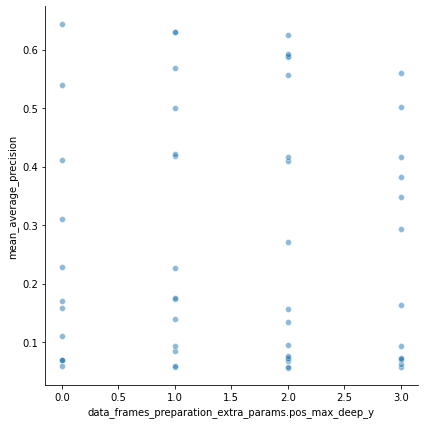

In [22]:
import seaborn as sns
#data_frames_preparation_extra_params.max_relative_pos_y
# Plot miles per gallon against horsepower with other semantics
sns.relplot(y="mean_average_precision", 
            x="data_frames_preparation_extra_params.pos_max_deep_y", 
            alpha=.5, 
            height=6, data=df)

In [23]:
import plotly.express as px
fig = px.scatter(df, 
                 x="data_frames_preparation_extra_params.max_relative_pos_y", 
                 y="data_frames_preparation_extra_params.pos_max_deep_y",
                size="mean_average_precision")
fig.show()